### EXPLORACIÓN


In [54]:
import pandas as pd
import numpy as np

In [55]:
df = pd.read_excel('../datasets/train_noticias.xlsx')
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head())

Dimensiones del dataset: (676, 7)

Primeras filas:
   Id Category      Topic          Source  \
0   1     Fake  Education  El Ruinaversal   
1   2     Fake  Education     Hay noticia   
2   3     Fake  Education  El Ruinaversal   
3   4     True  Education    EL UNIVERSAL   
4   5     Fake  Education          Lamula   

                                            Headline  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1            La palabra "haiga", aceptada por la RAE   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  pretenden aprobar libros escolares con conteni...   

                                                Text  \
0  RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
1  La palabra "haiga", aceptada por la RAE La Rea...   
2  YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...   
3  UNAM capacitará a maestros para aprobar prueba...   
4  Alerta: pretenden aprobar libros escolares con...   

    

In [56]:
print(f"\nNombres de columnas:")
print(df.columns.tolist())


Nombres de columnas:
['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link']


In [57]:
print(f"\nValores únicos en Category:")
print(df['Category'].unique())
print(f"\nDistribución de categorías:")
print(df['Category'].value_counts())


Valores únicos en Category:
['Fake' 'True']

Distribución de categorías:
Category
Fake    338
True    338
Name: count, dtype: int64


In [58]:
print(f"\nEstadísticas descriptivas:")
print(df.describe(include='object'))


Estadísticas descriptivas:
       Category     Topic     Source  \
count       676       676        676   
unique        2         9        134   
top        Fake  Politics  El Dizque   
freq        338       226         99   

                                                 Headline  \
count                                                 676   
unique                                                676   
top     RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
freq                                                    1   

                                                     Text  \
count                                                 676   
unique                                                676   
top     RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONAR...   
freq                                                    1   

                                                     Link  
count                                                 676  
unique                                 

In [59]:
print("Muestra de noticias Falsas:")
fakes = df[df['Category'] == 'Fake'].head(3)
for idx, row in fakes.iterrows():
    print(f"\n Noticia {idx} ")
    print(f"Topic: {row['Topic']}")
    print(f"Headline: {row['Headline'][:100] if pd.notnull(row['Headline']) else 'N/A'}")
    print(f"Text: {str(row['Text'])[:150] if pd.notnull(row['Text']) else 'N/A'}...")

Muestra de noticias Falsas:

 Noticia 0 
Topic: Education
Headline: RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLE
Text: RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA"
España.- El presidente de la Real Academia...

 Noticia 1 
Topic: Education
Headline: La palabra "haiga", aceptada por la RAE
Text: La palabra "haiga", aceptada por la RAE La Real Academia de la Lengua (RAE), ha aceptado el uso de "HAIGA", para su utilización en las tres personas d...

 Noticia 2 
Topic: Education
Headline: YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS LIBROS DE TEXTO DE LA SEP PARA HACERLOS MÁS ATRACTIVOS
Text: YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS LIBROS DE TEXTO DE LA SEP PARA HACERLOS MÁS ATRACTIVOS
México.- El director de la Secretaría de Educación...


In [60]:
print("Muestra de noticias Verdaderas:")
trues = df[df['Category'] == 'True'].head(3)
for idx, row in trues.iterrows():
    print(f"\nNoticia {idx}")
    print(f"Topic: {row['Topic']}")
    print(f"Headline: {row['Headline'][:100] if pd.notnull(row['Headline']) else 'N/A'}")
    print(f"Text: {str(row['Text'])[:150] if pd.notnull(row['Text']) else 'N/A'}...")

Muestra de noticias Verdaderas:

Noticia 3
Topic: Education
Headline: UNAM capacitará a maestros para aprobar prueba Pisa
Text: UNAM capacitará a maestros para aprobar prueba Pisa
La máxima casa de estudios y la SEP firmaron cinco convenios para que las facultades de Ciencias y...

Noticia 5
Topic: Education
Headline: Un paso más cerca de hacer los exámenes 'online'
Text: Un paso más cerca de hacer los exámenes 'online'
Cerca de *NUMBER* universitarios de seis universidades europeas participan este cuatrimestre en la úl...

Noticia 7
Topic: Education
Headline: Niño de *NUMBER* años se prepara para entrar a la universidad
Text: Niño de *NUMBER* años se prepara para entrar a la universidad
Con un coeficiente intelectual de *NUMBER*, Laurent Simons terminó su educación secundar...


In [61]:
df['text_length'] = df['Text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['headline_length'] = df['Headline'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

In [62]:
print(f"\nLongitud promedio de textos:")
print(f"Fakes: {df[df['Category']=='Fake']['text_length'].mean():.0f} caracteres")
print(f"True: {df[df['Category']=='True']['text_length'].mean():.0f} caracteres")

print(f"\nLongitud promedio de headlines:")
print(f"Fakes: {df[df['Category']=='Fake']['headline_length'].mean():.0f} caracteres")
print(f"True: {df[df['Category']=='True']['headline_length'].mean():.0f} caracteres")


Longitud promedio de textos:
Fakes: 1762 caracteres
True: 2808 caracteres

Longitud promedio de headlines:
Fakes: 73 caracteres
True: 63 caracteres


In [63]:
def count_encoding_issues(text):
    if not isinstance(text, str):
        return 0
    issues = sum(1 for char in text if ord(char) > 127 and char not in 'áéíóúÁÉÍÓÚñÑüÜ¿¡')
    return issues

df['encoding_issues'] = df['Text'].apply(count_encoding_issues)

In [64]:
print(f"Total issues: {df['encoding_issues'].sum()}")
print(f"Textos con issues: {(df['encoding_issues'] > 0).sum()}")

Total issues: 1576
Textos con issues: 175


In [65]:
with open('../datasets/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

print(f"\nStopwords cargadas: {len(stopwords)}")
print(f"Primeras 10 stopwords: {stopwords[:10]}")


Stopwords cargadas: 652
Primeras 10 stopwords: ['a', 'acerca', 'actualmente', 'adelante', 'además', 'adonde', 'áestarían', 'afirmó', 'agregó', 'ahí']


In [66]:
with open('../datasets/dataset_sentimiento.txt', 'r', encoding='utf-8') as f:
    sentimiento_lines = f.read().splitlines()

print(f"\nLíneas de sentimiento cargadas: {len(sentimiento_lines)}")
print(f"Primeras 5 entradas: {sentimiento_lines[:5]}")


Líneas de sentimiento cargadas: 1560
Primeras 5 entradas: ['Palabra,Sentimiento', 'Bulo,Negativo', 'Fake,Negativo', 'Mentira,Negativo', 'Engaño,Negativo']


In [67]:
print("RESUMEN DEL DATASET DE CLASIFICACIÓN")
print("")
print(f"Total de noticias: {len(df)}")
print(f"Noticias falsas (Fake): {(df['Category']=='Fake').sum()} ({(df['Category']=='Fake').mean()*100:.1f}%)")
print(f"Noticias verdaderas (True): {(df['Category']=='True').sum()} ({(df['Category']=='True').mean()*100:.1f}%)")
print(f"Columnas disponibles: {list(df.columns)}")
print(f"Valores nulos en Text: {df['Text'].isnull().sum()}")
print(f"Valores nulos en Headline: {df['Headline'].isnull().sum()}")
print(f"Topics únicos: {df['Topic'].nunique()}")
print(f"Fuentes únicas: {df['Source'].nunique()}")

RESUMEN DEL DATASET DE CLASIFICACIÓN

Total de noticias: 676
Noticias falsas (Fake): 338 (50.0%)
Noticias verdaderas (True): 338 (50.0%)
Columnas disponibles: ['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link', 'text_length', 'headline_length', 'encoding_issues']
Valores nulos en Text: 0
Valores nulos en Headline: 0
Topics únicos: 9
Fuentes únicas: 134


In [68]:
print("\nANÁLISIS DETALLADO DE TOPIC:")

topic_counts = df['Topic'].value_counts()
print(f"\nTotal de Topics distintos: {len(topic_counts)}")
print(f"\nTop 10 Topics más comunes:")
for topic, count in topic_counts.head(10).items():
    porcentaje = (count/len(df))*100
    print(f"  {topic}: {count} noticias ({porcentaje:.1f}%)")


ANÁLISIS DETALLADO DE TOPIC:

Total de Topics distintos: 9

Top 10 Topics más comunes:
  Politics: 226 noticias (33.4%)
  Entertainment: 103 noticias (15.2%)
  Society: 93 noticias (13.8%)
  Sport: 86 noticias (12.7%)
  Science: 62 noticias (9.2%)
  Health: 32 noticias (4.7%)
  Economy: 30 noticias (4.4%)
  Security: 29 noticias (4.3%)
  Education: 15 noticias (2.2%)


In [69]:
topic_category = pd.crosstab(df['Topic'], df['Category'], margins=True)
print("\nDistribución de Fake/True por Topic")
print(topic_category.sort_values('All', ascending=False).head(11))


Distribución de Fake/True por Topic
Category       Fake  True  All
Topic                         
All             338   338  676
Politics        105   121  226
Entertainment    55    48  103
Society          52    41   93
Sport            41    45   86
Science          30    32   62
Health           16    16   32
Economy          12    18   30
Security         18    11   29
Education         9     6   15


In [70]:
print("\nANÁLISIS DE SOURCE:")

source_counts = df['Source'].value_counts()
print(f"\nTotal de Sources distintos: {len(source_counts)}")
print(f"\nTop 10 Sources más comunes:")
for source, count in source_counts.head(10).items():
    porcentaje = (count/len(df))*100
    print(f"  {source}: {count} noticias ({porcentaje:.1f}%)")


ANÁLISIS DE SOURCE:

Total de Sources distintos: 134

Top 10 Sources más comunes:
  El Dizque: 99 noticias (14.6%)
  El Ruinaversal: 55 noticias (8.1%)
  El país: 45 noticias (6.7%)
  Excelsior: 35 noticias (5.2%)
  Hay noticia: 31 noticias (4.6%)
  El Universal: 28 noticias (4.1%)
  Censura 0: 25 noticias (3.7%)
  Forbes: 21 noticias (3.1%)
  Proceso: 18 noticias (2.7%)
  EL UNIVERSAL: 16 noticias (2.4%)


In [71]:
print("\nVERIFICACIÓN DE DUPLICADOS:")

duplicados_texto = df.duplicated(subset=['Text'], keep=False)
print(f"Noticias con texto duplicado: {duplicados_texto.sum()}")

if duplicados_texto.sum() > 0:
    print("\nEjemplos de duplicados:")
    dups = df[duplicados_texto]
    textos_dups = dups['Text'].unique()[:3]
    for i, texto in enumerate(textos_dups):
        print(f"\nDuplicado {i+1}:")
        print(f"Texto: {str(texto)[:100]}...")
        print(f"IDs asociados: {dups[dups['Text']==texto]['Id'].tolist()}")

# Duplicados en Headline
duplicados_headline = df.duplicated(subset=['Headline'], keep=False)
print(f"\nHeadlines duplicados: {duplicados_headline.sum()}")


VERIFICACIÓN DE DUPLICADOS:
Noticias con texto duplicado: 0

Headlines duplicados: 0


In [72]:
print(f"\n1. DATOS GENERALES:")
print(f"   Total noticias: {len(df)}")
print(f"   Balance: {len(df[df['Category']=='Fake'])} Fake vs {len(df[df['Category']=='True'])} True")

print(f"\n2. TOPICS:")
print(f"   Topics únicos REALES: {df['Topic'].nunique()}")
print(f"   Topics más comunes: {', '.join(df['Topic'].value_counts().head(3).index.tolist())}")

print(f"\n3. FUENTES:")
print(f"   Fuentes únicas: {df['Source'].nunique()}")
print(f"   Top 3 fuentes: {', '.join(df['Source'].value_counts().head(3).index.tolist())}")

print(f"\n4. CALIDAD DE TEXTOS:")
print(f"   Textos válidos: {df['Text'].notnull().sum()}")
print(f"   Headlines válidos: {df['Headline'].notnull().sum()}")
print(f"   Longitud promedio texto: {df['text_length'].mean():.0f} chars")
print(f"   Textos muy cortos (<50 chars): {len(df[df['text_length'] < 50])}")

print(f"\n5. PROBLEMAS IDENTIFICADOS:")
problemas = []

if df['text_length'].min() < 10:
    problemas.append(f"Textos extremadamente cortos ({df['text_length'].min()} chars)")

if duplicados_texto.sum() > 0:
    problemas.append(f"{duplicados_texto.sum()} textos duplicados")

if df['Source'].isnull().sum() > 0:
    problemas.append(f"{df['Source'].isnull().sum()} Sources vacíos")

if problemas:
    for i, prob in enumerate(problemas, 1):
        print(f"   {i}. {prob}")
else:
    print("   Ningún problema crítico encontrado")



1. DATOS GENERALES:
   Total noticias: 676
   Balance: 338 Fake vs 338 True

2. TOPICS:
   Topics únicos REALES: 9
   Topics más comunes: Politics, Entertainment, Society

3. FUENTES:
   Fuentes únicas: 134
   Top 3 fuentes: El Dizque, El Ruinaversal, El país

4. CALIDAD DE TEXTOS:
   Textos válidos: 676
   Headlines válidos: 676
   Longitud promedio texto: 2285 chars
   Textos muy cortos (<50 chars): 0

5. PROBLEMAS IDENTIFICADOS:
   Ningún problema crítico encontrado


### LIMPIEZA Y PROCESAMINETO

In [73]:
import pandas as pd
import numpy as np
import re
import string
from unicodedata import normalize

df = pd.read_excel('../datasets/train_noticias.xlsx')

In [74]:
print("LIMPIEZA BÁSICA DE COLUMNAS")

df['Category_bin'] = df['Category'].map({'Fake': 0, 'True': 1})
print(f"Category convertida a binario: 0=Fake, 1=True")

text_columns = ['Topic', 'Source', 'Headline', 'Text']
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()
    
print(f"Espacios en blanco eliminados en {len(text_columns)} columnas")

LIMPIEZA BÁSICA DE COLUMNAS
Category convertida a binario: 0=Fake, 1=True
Espacios en blanco eliminados en 4 columnas


In [75]:
with open('../datasets/stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords_original = f.read().splitlines()

stopwords = []
for word in stopwords_original:
    try:
        cleaned = word.encode('latin-1').decode('utf-8', errors='ignore')
        cleaned = cleaned.strip()
        if cleaned:
            stopwords.append(cleaned.lower())
    except:
        cleaned = word.strip()
        if cleaned:
            stopwords.append(cleaned.lower())

stopwords = list(set(stopwords))  
print(f"Stopwords cargadas: {len(stopwords)} palabras")

with open('../datasets/dataset_sentimiento.txt', 'r', encoding='utf-8') as f:
    sentimiento_lines = f.read().splitlines()

palabras_positivas = []
palabras_negativas = []

for line in sentimiento_lines:
    if ',' in line:
        palabra, sentimiento = line.split(',', 1)
        palabra = palabra.strip().lower()
        if sentimiento.strip() == 'Positivo':
            palabras_positivas.append(palabra)
        elif sentimiento.strip() == 'Negativo':
            palabras_negativas.append(palabra)

Stopwords cargadas: 639 palabras


In [76]:
def limpiar_texto(texto):
    if not isinstance(texto, str):
        return 
    
    texto = texto.lower()
    
    reemplazos = {
        'Ã¡': 'á', 'Ã©': 'é', 'Ã­': 'í', 'Ã³': 'ó', 'Ãº': 'ú',
        'Ã±': 'ñ', 'Ã': 'Á', 'Ã‰': 'É', 'Ã': 'Í',
        'Ã“': 'Ó', 'Ãš': 'Ú', 'Ã‘': 'Ñ',
        'â€œ': '"', 'â€': '"', 'â€™': "'"
    }
    
    for viejo, nuevo in reemplazos.items():
        texto = texto.replace(viejo, nuevo)
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto)
    texto = re.sub(r'@\w+|#\w+', '', texto)
    texto = re.sub(r'[^\w\sáéíóúÁÉÍÓÚñÑ¿?¡!.,;:()-]', ' ', texto)
    texto = re.sub(r'\b\d+\b', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    return texto

def eliminar_stopwords(texto):
    if not isinstance(texto, str):
        return ""
    
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords]
    return ' '.join(palabras_filtradas)

In [77]:
df['Text_original'] = df['Text'].copy()
df['Text_limpio'] = df['Text'].apply(limpiar_texto)

print("Antes vs Después de limpieza:")
for i in range(2):
    original = df.iloc[i]['Text_original']
    limpio = df.iloc[i]['Text_limpio']
    
    print(f"\nNoticia ID {df.iloc[i]['Id']}:")
    print(f"Original ({len(str(original))} chars): {str(original)[:100]}...")
    print(f"Limpio ({len(limpio)} chars): {limpio[:100]}...")

Antes vs Después de limpieza:

Noticia ID 1:
Original (2605 chars): RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLE...
Limpio (2584 chars): rae incluirá la palabra lady en el diccionario del idioma español como definición de mujer problemát...

Noticia ID 2:
Original (1063 chars): La palabra "haiga", aceptada por la RAE La Real Academia de la Lengua (RAE), ha aceptado el uso de "...
Limpio (1053 chars): la palabra haiga , aceptada por la rae la real academia de la lengua (rae), ha aceptado el uso de ha...


In [78]:
print("\nAPLICANDO LIMPIEZA AL HEADLINE")

df['Headline_original'] = df['Headline'].copy()
df['Headline_limpio'] = df['Headline'].apply(limpiar_texto)

print("Comparación Headline:")
for i in range(2):
    original = df.iloc[i]['Headline_original']
    limpio = df.iloc[i]['Headline_limpio']
    
    print(f"\nID {df.iloc[i]['Id']}:")
    print(f"Original: {original}")
    print(f"Limpio: {limpio}")


APLICANDO LIMPIEZA AL HEADLINE
Comparación Headline:

ID 1:
Original: RAE INCLUIRÁ LA PALABRA "LADY" EN EL DICCIONARIO DEL IDIOMA ESPAÑOL COMO DEFINICIÓN DE "MUJER PROBLEMÁTICA"
Limpio: rae incluirá la palabra lady en el diccionario del idioma español como definición de mujer problemática

ID 2:
Original: La palabra "haiga", aceptada por la RAE
Limpio: la palabra haiga , aceptada por la rae


In [79]:
print("\nELIMINANDO STOPWORDS")

df['Text_sin_stopwords'] = df['Text_limpio'].apply(eliminar_stopwords)
df['Headline_sin_stopwords'] = df['Headline_limpio'].apply(eliminar_stopwords)

print("Muestra sin stopwords:")
for i in range(2):
    print(f"\nID {df.iloc[i]['Id']}:")
    print(f"Texto (primeras 50 palabras): {' '.join(df.iloc[i]['Text_sin_stopwords'].split()[:20])}...")


ELIMINANDO STOPWORDS
Muestra sin stopwords:

ID 1:
Texto (primeras 50 palabras): rae incluirá palabra lady diccionario idioma español definición mujer problemática españa.- presidente real academia española (rae), darío villanueva, informó conferencia...

ID 2:
Texto (primeras 50 palabras): palabra haiga , aceptada rae real academia lengua (rae), aceptado haiga , utilización personas singular presente subjuntivo verbo hacer, asegura...


In [80]:
print("\nANÁLISIS DE SENTIMIENTO")

def analizar_sentimiento(texto):
    if not isinstance(texto, str):
        return 0, 0, 0
    
    palabras = texto.split()
    if not palabras:
        return 0, 0, 0
    
    positivas = sum(1 for palabra in palabras if palabra in palabras_positivas)
    negativas = sum(1 for palabra in palabras if palabra in palabras_negativas)
    total_palabras_relevantes = positivas + negativas
    
    ratio_positivo = positivas / total_palabras_relevantes if total_palabras_relevantes > 0 else 0.5
    
    return positivas, negativas, ratio_positivo

df[['sent_pos', 'sent_neg', 'sent_ratio']] = df.apply(
    lambda row: pd.Series(analizar_sentimiento(row['Text_sin_stopwords'])), 
    axis=1
)

print("Estadísticas de sentimiento:")
print(f"Palabras positivas totales: {df['sent_pos'].sum()}")
print(f"Palabras negativas totales: {df['sent_neg'].sum()}")
print(f"Ratio positivo promedio: {df['sent_ratio'].mean():.3f}")

print("\nSentimiento por categoría:")
for categoria in ['Fake', 'True']:
    subset = df[df['Category'] == categoria]
    print(f"{categoria}:")
    print(f"  Ratio positivo: {subset['sent_ratio'].mean():.3f}")
    print(f"  Positivas/noticia: {subset['sent_pos'].mean():.2f}")
    print(f"  Negativas/noticia: {subset['sent_neg'].mean():.2f}")


ANÁLISIS DE SENTIMIENTO
Estadísticas de sentimiento:
Palabras positivas totales: 8054.0
Palabras negativas totales: 1470.0
Ratio positivo promedio: 0.840

Sentimiento por categoría:
Fake:
  Ratio positivo: 0.823
  Positivas/noticia: 8.97
  Negativas/noticia: 1.86
True:
  Ratio positivo: 0.857
  Positivas/noticia: 14.86
  Negativas/noticia: 2.49


In [81]:
print("\nEXTRACCIÓN DE CARACTERÍSTICAS ADICIONALES")

df['text_length_limpio'] = df['Text_limpio'].apply(len)
df['headline_length_limpio'] = df['Headline_limpio'].apply(len)

df['unique_words_ratio'] = df['Text_sin_stopwords'].apply(
    lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0
)

df['exclamaciones'] = df['Text_original'].apply(lambda x: str(x).count('!') + str(x).count('¡'))
df['interrogaciones'] = df['Text_original'].apply(lambda x: str(x).count('?') + str(x).count('¿'))

print("Nuevas características calculadas:")
caracteristicas_nuevas = ['text_length_limpio', 'headline_length_limpio', 
                          'unique_words_ratio', 'exclamaciones', 'interrogaciones',
                          'sent_pos', 'sent_neg', 'sent_ratio']

for feat in caracteristicas_nuevas:
    print(f"{feat}: min={df[feat].min():.2f}, max={df[feat].max():.2f}, mean={df[feat].mean():.2f}")   


EXTRACCIÓN DE CARACTERÍSTICAS ADICIONALES
Nuevas características calculadas:
text_length_limpio: min=96.00, max=12312.00, mean=2268.49
headline_length_limpio: min=17.00, max=128.00, mean=67.27
unique_words_ratio: min=0.44, max=1.00, mean=0.80
exclamaciones: min=0.00, max=11.00, mean=0.36
interrogaciones: min=0.00, max=16.00, mean=0.64
sent_pos: min=0.00, max=86.00, mean=11.91
sent_neg: min=0.00, max=31.00, mean=2.17
sent_ratio: min=0.00, max=1.00, mean=0.84


In [82]:
columnas_limpias = ['Id', 'Category', 'Category_bin', 'Topic', 'Source', 
                    'Headline_limpio', 'Text_limpio', 'Text_sin_stopwords',
                    'text_length_limpio', 'headline_length_limpio',
                    'unique_words_ratio', 'exclamaciones', 'interrogaciones',
                    'sent_pos', 'sent_neg', 'sent_ratio', 'Link']

df_limpio = df[columnas_limpias].copy()

df_limpio.to_csv('../datasets/train_noticias_limpio.csv', index=False, encoding='utf-8')

print(f"Dataset limpio guardado con {len(df_limpio)} registros y {len(df_limpio.columns)} columnas")
print(f"Archivo: ../datasets/train_noticias_limpio.csv")


Dataset limpio guardado con 676 registros y 17 columnas
Archivo: ../datasets/train_noticias_limpio.csv


### EXPLORACIÓN DE CARACTERÍSTICAS

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [84]:
df_limpio = pd.read_csv('../datasets/train_noticias_limpio.csv')
print(f"Dataset limpio cargado: {df_limpio.shape}")
print(f"Columnas: {df_limpio.columns.tolist()}")

Dataset limpio cargado: (676, 17)
Columnas: ['Id', 'Category', 'Category_bin', 'Topic', 'Source', 'Headline_limpio', 'Text_limpio', 'Text_sin_stopwords', 'text_length_limpio', 'headline_length_limpio', 'unique_words_ratio', 'exclamaciones', 'interrogaciones', 'sent_pos', 'sent_neg', 'sent_ratio', 'Link']


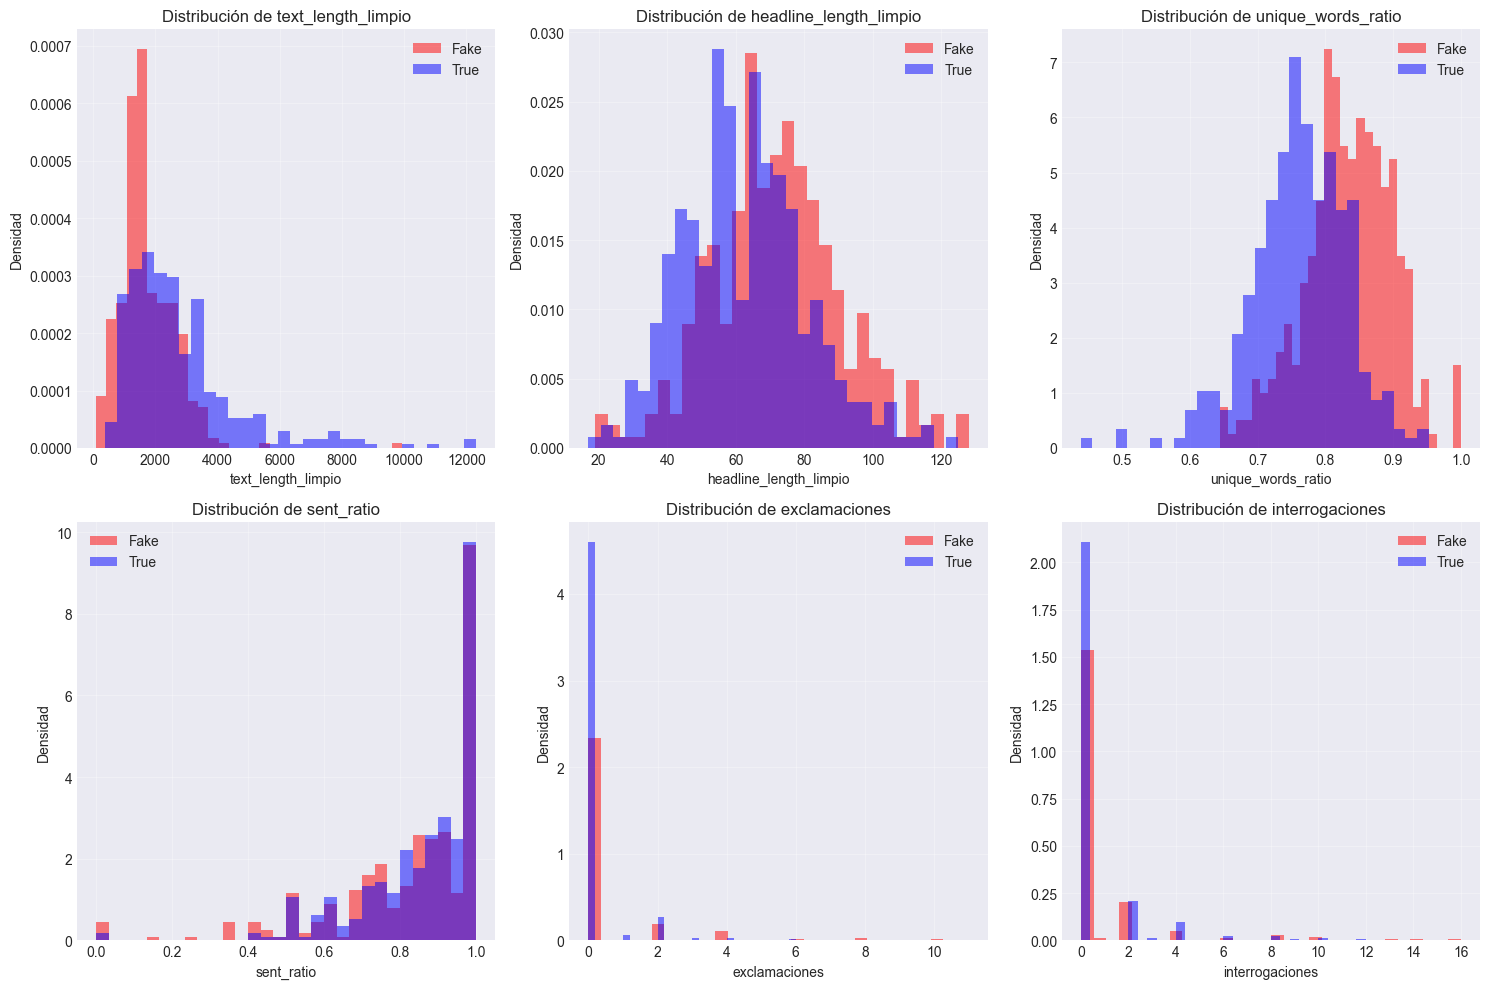

In [85]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features_vis = ['text_length_limpio', 'headline_length_limpio', 'unique_words_ratio',
                'sent_ratio', 'exclamaciones', 'interrogaciones']

for i, feature in enumerate(features_vis):
    ax = axes[i]
    
    for categoria, color in [('Fake', 'red'), ('True', 'blue')]:
        subset = df_limpio[df_limpio['Category'] == categoria]
        ax.hist(subset[feature], bins=30, alpha=0.5, label=categoria, 
                color=color, density=True)
    
    ax.set_title(f'Distribución de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Densidad')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


MATRIZ DE CORRELACIONES
Correlación con Category_bin (1=True):
  unique_words_ratio: -0.468 (Fuerte)
  text_length_limpio: +0.334 (Fuerte)
  sent_pos: +0.310 (Fuerte)
  headline_length_limpio: -0.254 (Moderada)
  exclamaciones: -0.145 (Moderada)
  sent_neg: +0.096 (Débil)
  sent_ratio: +0.092 (Débil)
  interrogaciones: -0.031 (Débil)


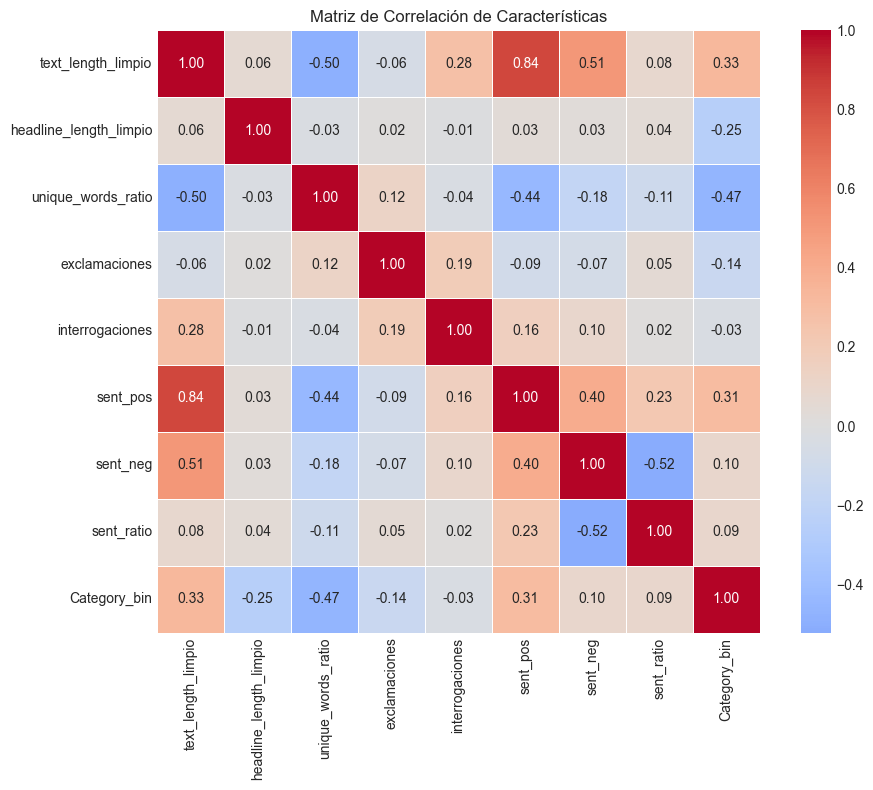

In [86]:
print("\nMATRIZ DE CORRELACIONES")

correlations = {}
for feature in features_numericas:
    correlation = df_limpio[feature].corr(df_limpio['Category_bin'])
    correlations[feature] = correlation

correlations_sorted = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Correlación con Category_bin (1=True):")
for feature, corr in correlations_sorted:
    print(f"  {feature}: {corr:+.3f} ({'Fuerte' if abs(corr) > 0.3 else 'Moderada' if abs(corr) > 0.1 else 'Débil'})")

corr_matrix = df_limpio[features_numericas + ['Category_bin']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Matriz de Correlación de Características')
plt.tight_layout()
plt.show()

In [87]:
print("\nANÁLISIS DE TOPICS POR CATEGORÍA")

topic_table = pd.crosstab(df_limpio['Topic'], df_limpio['Category'], 
                          margins=True, margins_name="Total")

print("Distribución de Topics:")
print(topic_table.sort_values('Total', ascending=False).head(10))

topic_table['% Fake'] = (topic_table['Fake'] / topic_table['Total']) * 100
topic_table['% True'] = (topic_table['True'] / topic_table['Total']) * 100

print("\nTopics con mayor proporción de Fake:")
top_fake = topic_table[topic_table['Total'] > 5].sort_values('% Fake', ascending=False).head(5)
print(top_fake[['Fake', 'True', 'Total', '% Fake', '% True']])

print("\nTopics con mayor proporción de True:")
top_true = topic_table[topic_table['Total'] > 5].sort_values('% True', ascending=False).head(5)
print(top_true[['Fake', 'True', 'Total', '% Fake', '% True']])


ANÁLISIS DE TOPICS POR CATEGORÍA
Distribución de Topics:
Category       Fake  True  Total
Topic                           
Total           338   338    676
Politics        105   121    226
Entertainment    55    48    103
Society          52    41     93
Sport            41    45     86
Science          30    32     62
Health           16    16     32
Economy          12    18     30
Security         18    11     29
Education         9     6     15

Topics con mayor proporción de Fake:
Category       Fake  True  Total     % Fake     % True
Topic                                                 
Security         18    11     29  62.068966  37.931034
Education         9     6     15  60.000000  40.000000
Society          52    41     93  55.913978  44.086022
Entertainment    55    48    103  53.398058  46.601942
Total           338   338    676  50.000000  50.000000

Topics con mayor proporción de True:
Category  Fake  True  Total     % Fake     % True
Topic                              

In [88]:
print("\nANÁLISIS DE LÉXICO ESPECÍFICO")

def contar_palabras_clave(texto, palabras_clave):
    if not isinstance(texto, str):
        return 0
    texto = texto.lower()
    return sum(1 for palabra in palabras_clave if palabra in texto)

palabras_fake = ['fake', 'falso', 'mentira', 'engaño', 'bulo', 'rumor', 
                 'desinformación', 'manipulación', 'conspiración', 'fraude']

palabras_true = ['oficial', 'confirmado', 'verificado', 'fuente', 'estudio',
                 'investigación', 'datos', 'estadísticas', 'evidencia']

df_limpio['count_fake_words'] = df_limpio['Text_limpio'].apply(
    lambda x: contar_palabras_clave(x, palabras_fake))
df_limpio['count_true_words'] = df_limpio['Text_limpio'].apply(
    lambda x: contar_palabras_clave(x, palabras_true))

print("Palabras clave por categoría:")
print(f"Fake - Promedio palabras 'fake': {df_limpio[df_limpio['Category']=='Fake']['count_fake_words'].mean():.2f}")
print(f"True - Promedio palabras 'fake': {df_limpio[df_limpio['Category']=='True']['count_fake_words'].mean():.2f}")
print(f"Fake - Promedio palabras 'true': {df_limpio[df_limpio['Category']=='Fake']['count_true_words'].mean():.2f}")
print(f"True - Promedio palabras 'true': {df_limpio[df_limpio['Category']=='True']['count_true_words'].mean():.2f}")


ANÁLISIS DE LÉXICO ESPECÍFICO
Palabras clave por categoría:
Fake - Promedio palabras 'fake': 0.11
True - Promedio palabras 'fake': 0.12
Fake - Promedio palabras 'true': 0.44
True - Promedio palabras 'true': 0.67


In [89]:
print("\nANÁLISIS DE COMPLEJIDAD DE TEXTO")

import textstat

def calcular_complejidad(texto):
    if not isinstance(texto, str) or len(texto) < 50:
        return 0
    try:
        palabras = texto.split()
        oraciones = texto.count('.') + texto.count('!') + texto.count('?')
        
        if len(palabras) == 0 or oraciones == 0:
            return 0
            
        palabras_por_oracion = len(palabras) / oraciones
        silabas = sum(textstat.syllable_count(p) for p in palabras[:100])  # Muestra
        
        flesch = 206.835 - 1.015 * palabras_por_oracion - 84.6 * (silabas / len(palabras[:100]))
        return flesch
    except:
        return 0

df_limpio['complejidad'] = df_limpio['Text_limpio'].apply(calcular_complejidad)

print("Complejidad de lectura (Flesch):")
print(f"  Más alto = más fácil de leer (0-100)")
print(f"  Fake - Promedio: {df_limpio[df_limpio['Category']=='Fake']['complejidad'].mean():.2f}")
print(f"  True - Promedio: {df_limpio[df_limpio['Category']=='True']['complejidad'].mean():.2f}")


ANÁLISIS DE COMPLEJIDAD DE TEXTO
Complejidad de lectura (Flesch):
  Más alto = más fácil de leer (0-100)
  Fake - Promedio: 25.90
  True - Promedio: 27.91


### EVALUACION DE MODELOS 

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

features_finales_correlacion = [
    'unique_words_ratio',      
    'text_length_limpio',       
    'sent_pos',                
    'headline_length_limpio',  
    'exclamaciones',           
    'complejidad',             
    'count_true_words'         
]

X = df_limpio[features_finales_correlacion]
y = df_limpio['Category_bin']

print(f"Características seleccionadas ({len(features_finales_correlacion)}):")
for feat in features_finales_correlacion:
    print(f"  - {feat}")

print(f"\nDimensiones: X={X.shape}, y={y.shape}")

Características seleccionadas (7):
  - unique_words_ratio
  - text_length_limpio
  - sent_pos
  - headline_length_limpio
  - exclamaciones
  - complejidad
  - count_true_words

Dimensiones: X=(676, 7), y=(676,)


In [91]:
print("\nDIVISIÓN TRAIN-TEST")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape} ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Test: {X_test.shape} ({(len(X_test)/len(X))*100:.1f}%)")
print(f"\nDistribución en Train: {y_train.value_counts().to_dict()}")
print(f"Distribución en Test: {y_test.value_counts().to_dict()}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DIVISIÓN TRAIN-TEST
Train: (540, 7) (79.9%)
Test: (136, 7) (20.1%)

Distribución en Train: {0: 270, 1: 270}
Distribución en Test: {1: 68, 0: 68}


In [92]:
print("\nMODELO 1: RANDOM FOREST (BASELINE)")

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train_scaled, y_train)


y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("Resultados Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Fake', 'True']))

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f"\nValidación Cruzada (5-fold) F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")


MODELO 1: RANDOM FOREST (BASELINE)
Resultados Random Forest:
Accuracy: 0.8015
F1-Score: 0.8000

Classification Report:
              precision    recall  f1-score   support

        Fake       0.80      0.81      0.80        68
        True       0.81      0.79      0.80        68

    accuracy                           0.80       136
   macro avg       0.80      0.80      0.80       136
weighted avg       0.80      0.80      0.80       136


Validación Cruzada (5-fold) F1-Score: 0.7551 (+/- 0.0944)


In [93]:
print("\nMODELO 2: XGBOOST (GRADIENT BOOSTING)")

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Resultados XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Fake', 'True']))

importancias = xgb_model.feature_importances_
print("\nImportancia de características (XGBoost):")
for feat, imp in sorted(zip(features_finales_correlacion, importancias), key=lambda x: x[1], reverse=True):
    print(f"  {feat}: {imp:.4f}")


MODELO 2: XGBOOST (GRADIENT BOOSTING)
Resultados XGBoost:
Accuracy: 0.7426
F1-Score: 0.7445

Classification Report:
              precision    recall  f1-score   support

        Fake       0.75      0.74      0.74        68
        True       0.74      0.75      0.74        68

    accuracy                           0.74       136
   macro avg       0.74      0.74      0.74       136
weighted avg       0.74      0.74      0.74       136


Importancia de características (XGBoost):
  unique_words_ratio: 0.2713
  headline_length_limpio: 0.1717
  text_length_limpio: 0.1285
  exclamaciones: 0.1223
  complejidad: 0.1069
  count_true_words: 0.1052
  sent_pos: 0.0941


In [94]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True
)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("Resultados SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Fake', 'True']))

Resultados SVM:
Accuracy: 0.7500
F1-Score: 0.7463

Classification Report:
              precision    recall  f1-score   support

        Fake       0.74      0.76      0.75        68
        True       0.76      0.74      0.75        68

    accuracy                           0.75       136
   macro avg       0.75      0.75      0.75       136
weighted avg       0.75      0.75      0.75       136



In [95]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    penalty='l2',
    C=1.0,
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)

lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Resultados Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Fake', 'True']))


Resultados Logistic Regression:
Accuracy: 0.7794
F1-Score: 0.7692

Classification Report:
              precision    recall  f1-score   support

        Fake       0.76      0.82      0.79        68
        True       0.81      0.74      0.77        68

    accuracy                           0.78       136
   macro avg       0.78      0.78      0.78       136
weighted avg       0.78      0.78      0.78       136



### GUARDAR EL MODELO GANADOR

In [96]:
import os
import joblib
import json
from datetime import datetime

if not os.path.exists('../models'):
    os.makedirs('../models')
    print("✓ Carpeta 'models' creada")

timestamp = datetime.now().strftime("%Y%m%d_%H%M")

modelo_path = f'../models/modelo_desinformacion_v1_{timestamp}.pkl'
joblib.dump(rf_model, modelo_path)

scaler_path = f'../models/scaler_desinformacion_v1_{timestamp}.pkl'
joblib.dump(scaler, scaler_path)

features_path = f'../models/features_desinformacion_v1_{timestamp}.json'
with open(features_path, 'w', encoding='utf-8') as f:
    json.dump(features_finales_correlacion, f, indent=2)

modelo_simple_path = '../models/modelo_desinformacion.pkl'
scaler_simple_path = '../models/scaler_desinformacion.pkl'
features_simple_path = '../models/features_desinformacion.json'

joblib.dump(rf_model, modelo_simple_path)
joblib.dump(scaler, scaler_simple_path)
with open(features_simple_path, 'w', encoding='utf-8') as f:
    json.dump(features_finales_correlacion, f, indent=2)

